# Goal

**Multi-Class Classification** - To classify a sequence of genes into different categories. 

In [1]:
# set the directory to where the data is
import os

os.chdir(r"D:\Gene_Project")

In [2]:
# pandas for dealing with the data
import pandas as pd
# setting for seeing the entire string
pd.options.display.max_colwidth = None
pd.set_option('display.max_rows', 500)

In [3]:
# load the data - new data that was provided
data = pd.read_csv(r"pul_seq_low_high_substr_year_corrected.tsv", sep = "\t")

In [4]:
data.head()

,PULid,sig_gene_seq,low_level_substr,high_level_substr,Pub_year
0,PUL0001,"GH1,8.A.49,CE2,GH130,GH130,3.A.1,3.A.1,SBP_bac_1,LacI,GH36,GH113",beta-mannan,beta-mannan,2019
1,PUL0002,GH16,lichenan,beta-glucan,1996
2,PUL0003,"GH30_8,GH43_16|CBM6",xylan,xylan,2016
3,PUL0004,"4.A.1,GH1","glucose,cellobiose,maltose",multiple_substrates,2016
4,PUL0005,"GH94,GH3","beta-glucan,sophorose,laminaribiose",multiple_substrates,2016


In [5]:
# data[data["high_level_substr"] == 'multiple_substrates']["low_level_substr"].value_counts()

In [6]:
# all_classes = list(data["high_level_substr"].value_counts().keys())

In [7]:
# all_classes

In [8]:
# # correspondence between high and low level

# for classes in all_classes: 
#     print(classes)
#     filtered_data = data[data["high_level_substr"] == classes]
#     correspondence = np.mean(filtered_data["high_level_substr"].values == filtered_data["low_level_substr"].values)
#     print(correspondence)

In [9]:
data["low_level_substr"].value_counts()

capsule polysaccharide                                           60
O-antigen                                                        37
pectin                                                           28
xylan                                                            25
alginate                                                         21
O-glycan,N-glycan                                                21
cellobiose                                                       14
chitin                                                           14
beta-glucan                                                      12
cellulose                                                        12
N-glycan                                                         12
sucrose                                                          12
lactose                                                          11
galactan                                                         10
arabinan                                        

In [168]:
# data[data["high_level_substr"] == "multiple_substrates"]

## Some data issues

In [169]:
# there is some null gene sequence
# was creating some bugs later in the code
# removed it

In [10]:
data[data.isnull().sum(axis = 1).astype(bool)]

,PULid,sig_gene_seq,low_level_substr,high_level_substr,Pub_year
75,PUL0076,NaN,"capsule polysaccharide,outer core capsule polysaccharide",multiple_substrates,2019


In [11]:
data = data.dropna()

In [12]:
data[data.isnull().sum(axis = 1).astype(bool)]

,PULid,sig_gene_seq,low_level_substr,high_level_substr,Pub_year


In [173]:
# give column names
# data.columns = ["sequence", "target", "year"]

In [174]:
# drop year
# data = data.drop(labels = "year",axis = 1).sample(frac = 1.0)

# Exploratory Data Analysis

1. Check the distribution of the substrates. 
2. Learn something about the genes that appear in the sequence. 

## Check the target distributions

In [13]:
# low level vs high level
# low level has 170 categories 
# probably not amenable for multi class classification
data["low_level_substr"].value_counts()

capsule polysaccharide                                           60
O-antigen                                                        37
pectin                                                           28
xylan                                                            25
alginate                                                         21
O-glycan,N-glycan                                                21
cellobiose                                                       14
chitin                                                           14
beta-glucan                                                      12
cellulose                                                        12
N-glycan                                                         12
sucrose                                                          12
lactose                                                          11
galactan                                                         10
arabinan                                        

In [176]:
len(data["low_level_substr"].value_counts())

170

In [177]:
# what is the missing class? that is the one which just says "-"?

In [14]:
data[data["high_level_substr"] == "-"]

,PULid,sig_gene_seq,low_level_substr,high_level_substr,Pub_year
35,PUL0036,"8.A.3,1.B.18,PL12,GT4,9.B.18,Aminotran_1_2,9.B.18",emulsan,-,2001
227,PUL0229,"HTH_AraC,8.A.59,3.A.1,3.A.1,3.A.1,GH67,GH10,GH43_12",aldouronate,-,2007
285,PUL0287,"MarR,4.A.3,4.A.3,GH1,4.A.3",unknown polysaccharide,-,2012
317,PUL0320,"PL11|CBM3,CBM66|PL3_1,CBM66|PL9_1,HTH_AraC,GH10|CBM3|CBM3|GH48,GH5_8|CBM3|CBM3|GH44,GH74|GH74|GH74|GH74|CBM3|CBM3|GH48,GT39,GH9|CBM3|CBM3|CBM3|GH5_8,GH5_8|CBM3|CBM3|CBM3|GH5_1,GH9|CBM3|CBM3|CBM3|GH48",glucan,-,"2018,2018"
319,PUL0322,"PL11|CBM3,CBM66|PL3_1,CBM66|PL9_1,CBM66|PL9_1,CBM66|PL9_1,HTH_AraC,GH74|GH74|GH74|GH74|CBM3|CBM3|GH48,GT39,GH9|CBM3|CBM3|CBM3|GH5_8,CBM22|CBM22|GH10|CBM3|CBM3|GH5_1,GH10|CBM3|GH12|GH48,GH5_8|CBM3|CBM3|GH44,GH9|CBM3|CBM3|CBM3|GH48",glucan,-,2018
344,PUL0347,"HTH_AraC,2.A.1,MarR,Glyoxalase,2.A.1,GH13_11",sorbitol,-,2014
406,PUL0409,"SIS|CBS,8.A.4,1.B.18,9.A.41,9.A.41,GT38,3.A.1,3.A.1",polysialic acid,-,2011
431,PUL0434,"CBM4|GH9,GH9,GH5_17,CBM4|GH9,CBM4,2.A.69",mannooligosaccharide,-,2000
451,PUL0454,"GH13_13|CBM41|CBM41,3.A.1,GT5,NUDIX,GT5,GH77,PfkB,GH13_13|CBM41|CBM41,GH13_2|CBM20",acarbose,-,2013


In [15]:
data["high_level_substr"].value_counts()

multiple_substrates           138
mono/di/trisaccharide          78
capsule polysaccharide         60
algal glycans                  40
pectin                         38
xylan                          38
O-antigen                      37
galactan                       36
alpha-glucan                   23
beta-mannan                    19
cellulose                      18
chitin                         15
glycosaminoglycan              14
beta-glucan                    13
N-glycan                       12
exopolysaccharide              10
-                               9
fructan                         8
alpha-mannan                    8
host glycan                     7
xyloglucan                      7
plant polysaccharide            6
glycoprotein                    6
human milk oligosaccharide      5
hemicellulose                   5
O-glycan                        3
Name: high_level_substr, dtype: int64

In [16]:
# how many are there? 
# much more manageable - 26
# this is what we will use for the multi class classification
len(data["low_level_substr"].value_counts())

170

In [17]:
# get the frequency counts
D = data.low_level_substr.value_counts()

In [18]:
# convert to a dictionary
D = dict(D)

In [19]:
# import the plotting packages
import matplotlib as mpl
import matplotlib.pyplot as plt

In [20]:
# some parameters for improved plotting aesthetics
mpl.rcParams['xtick.labelsize'] = 15 
plt.rcParams["font.weight"] = "bold"

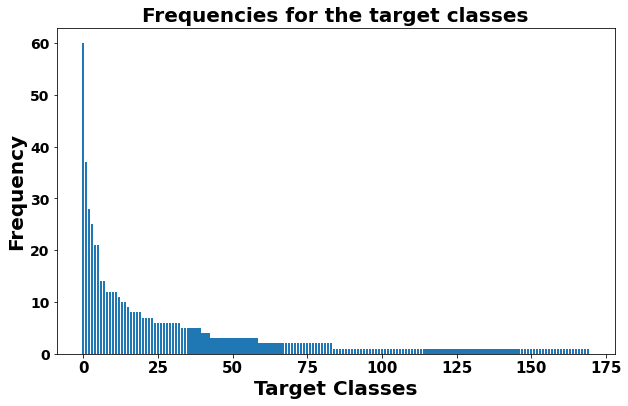

In [22]:
# define the plotting area
plt.figure(figsize = (10,6))
# need a bar plot
plt.bar(range(len(D)), list(D.values()), align='center')
# put the labels but rotate them
# plt.xticks(range(len(D)), list(D.keys()), rotation = 90, weight = "bold")
# increase the ticks on y
plt.yticks(fontsize=14)
# give labels to x
plt.xlabel("Target Classes", weight = "bold", fontsize = 20)
# give labels to y
plt.ylabel("Frequency", weight = "bold", fontsize = 20)
# put the title
plt.title("Frequencies for the target classes", weight = "bold", fontsize = 20)
plt.show()

## What about the genes in the sequence?

In [23]:
# collect all the genes from each sequence
all_genes_per_sequence = [str(seq).split(",") for seq in data["sig_gene_seq"]]
# loop over the list of genes and flatten it
all_genes = [gene for list_genes in all_genes_per_sequence for gene in list_genes]

In [24]:
# import numpy to deal with arrays
import numpy as np

In [25]:
# how many unique genes? 
len(np.unique(all_genes))

525

In [26]:
# import counter function
from collections import Counter

In [27]:
# get the frequency counts
freq_count = Counter(all_genes)

In [28]:
freq_count

Counter({'GH1': 34,
         '8.A.49': 8,
         'CE2': 3,
         'GH130': 29,
         '3.A.1': 392,
         'SBP_bac_1': 48,
         'LacI': 94,
         'GH36': 30,
         'GH113': 1,
         'GH16': 47,
         'GH30_8': 4,
         'GH43_16|CBM6': 4,
         '4.A.1': 19,
         'GH94': 8,
         'GH3': 71,
         'SIS|HTH_6': 1,
         '8.A.59': 17,
         'HTH_18|Response_reg|HTH_AraC': 1,
         'GH53': 9,
         '2.A.2': 44,
         'GH42': 18,
         'HTH_AraC': 152,
         'PfkB': 52,
         '2.A.1': 61,
         'GH32': 37,
         '8.A.46': 93,
         '1.B.14': 300,
         'PL8': 4,
         'GH88': 12,
         'GH43_11': 10,
         'GH10': 35,
         '9.B.28': 11,
         'GntR': 48,
         'GH39': 4,
         'GH67': 19,
         'GH52': 4,
         'CE4': 17,
         'GH51': 26,
         'GH48': 3,
         'GH8': 8,
         'GH9|CBM3': 7,
         'CBM4|GH9': 5,
         'GH20': 45,
         'GH9': 23,
         'HATPase_c|H

In [29]:
"-" in freq_count.keys()

False

In [30]:
# sort in descending order
D =dict(sorted(freq_count.items(), key=lambda item: item[1], reverse = True))

In [31]:
# manipulate for plotting
first2pairs = {k: D[k] for k in list(D)}

In [32]:
# variable assignment
D = first2pairs

In [33]:
# some parameters for improved plotting aesthetics
mpl.rcParams['xtick.labelsize'] = 15 
plt.rcParams["font.weight"] = "bold"

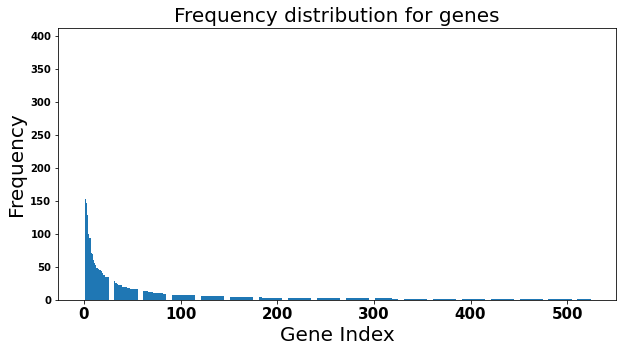

In [34]:
plt.figure(figsize = (10,5))
plt.bar(range(len(D)), list(D.values()), align='center')
plt.title("Frequency distribution for genes", fontsize = 20)
plt.xlabel("Gene Index", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.show()

In [35]:
# visualize the cdf
cdf_vec = np.cumsum(list(D.values()))/np.cumsum(list(D.values()))[-1]

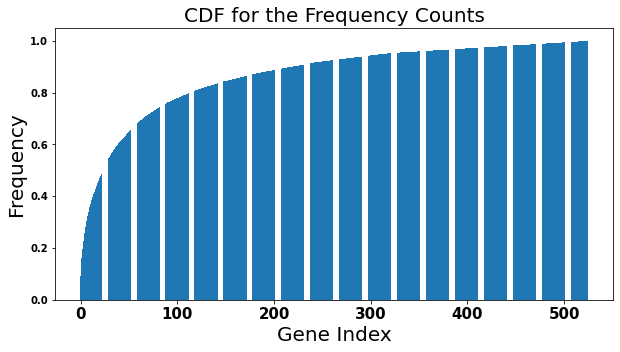

In [36]:
# make the plot for the cdf
plt.figure(figsize = (10,5))
plt.bar(range(len(cdf_vec)), cdf_vec, align='center')
plt.title("CDF for the Frequency Counts", fontsize = 20)
plt.xlabel("Gene Index", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.show()


# Prediction Models

## How many classes can we handle for greater than 80% accuracy?

In [81]:
# preprocessor
from sklearn.feature_extraction.text import CountVectorizer

In [82]:
# import the requisite packages
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier

In [83]:
# generic function that takes in the data and number of classes
def model_by_classes(num_classes, data, both = False, split_on_bar = False): 
    # get the frequency counts
    all_classes = list(data.low_level_substr.value_counts().keys())
    # remove multiple substrates
#     all_classes = [classes for classes in all_classes if classes not in ["multiple_substrates"]]
    # suppose using the top 2
    keep_these_many = num_classes
    # top_k_classes
    top_k = all_classes[:keep_these_many]
    # not top two
    not_top_k = [target for target in all_classes if target not in top_k]
    # get the data for the top k classes
    top_k_data = data[data.low_level_substr.isin(top_k)].reset_index(drop = True)
    # get the data for the non top_k classes
    not_top_k_data = data[data.low_level_substr.isin(not_top_k)].reset_index(drop = True)
    # give the same label to all the targets of the not_top_k_data
    not_top_k_data["low_level_substr"] = "other"
    # stack the top k and the not top k data together
    all_data = pd.concat([top_k_data, not_top_k_data], ignore_index = True)
    
    if split_on_bar == False:
        # instantiate the vectorizer again
        vectorizer = CountVectorizer(tokenizer=lambda x: str(x).split(','), lowercase = False)
    
    else: 
        vectorizer = CountVectorizer(tokenizer=lambda x: str(x).replace("|", ",").split(','), lowercase = False)
    
    # pipeline
    clf = Pipeline([('countvectorizer',vectorizer),('rf',RandomForestClassifier(n_jobs = 6))])
    # Parameters of pipelines can be set using ‘__’ separated parameter names:
    param_grid = {
    'countvectorizer__min_df': [1,2],
    'rf__n_estimators': [100,200,400], 
    'rf__max_features': ["auto", "log2"]
    }
    # fit the search
    search = GridSearchCV(clf, param_grid, n_jobs=7 , verbose = 3, cv = 3, scoring = "accuracy")
    
    # if both gene seq and category seq
    
    if both == True: 
        # fit the grid search
        search.fit(all_data["sig_gene_seq"] + "," + all_data["category_sequence"], all_data["low_level_substr"])
    else: 
        search.fit(all_data["sig_gene_seq"], all_data["low_level_substr"])
    # best score
    best_score = search.best_score_
    # std error
    std_accuracy = search.cv_results_['std_test_score'][np.argmax(search.cv_results_['mean_test_score'])]
    vectorizer.fit_transform(all_data["sig_gene_seq"])
    print(len(vectorizer.vocabulary_))
    return num_classes, best_score, std_accuracy

In [84]:
# functions that can help us do parallel computation
from joblib import Parallel, delayed

### only using gene data and not splitting on bar ("|")

In [97]:
# run the function in parallel
all_results = Parallel(n_jobs=7, verbose = 2)(delayed(model_by_classes)(i, data, False, False) for i in range(25, 45))

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  18 out of  20 | elapsed:  1.8min remaining:   12.0s
[Parallel(n_jobs=7)]: Done  20 out of  20 | elapsed:  1.8min finished


In [98]:
# get the error ranges
err_ranges = np.array(all_results)[:,2]*3

In [99]:
# put everything in a dataframe
df = pd.DataFrame(all_results)

In [100]:
# give column names
df.columns = ["num_classes", "mean_accuracy", "std_error_accuracy"]

In [101]:
# how much data do these classes cover
coverage = pd.DataFrame(data.low_level_substr.value_counts().cumsum()/data.low_level_substr.value_counts().cumsum()[-1])["low_level_substr"].values[25:45]

In [102]:
# round the coverage
coverage = np.round(coverage,2).astype(str)

In [103]:
coverage

array(['0.58', '0.59', '0.6', '0.61', '0.62', '0.63', '0.64', '0.65',
       '0.65', '0.66', '0.67', '0.68', '0.68', '0.69', '0.7', '0.71',
       '0.71', '0.72', '0.72', '0.73'], dtype='<U32')

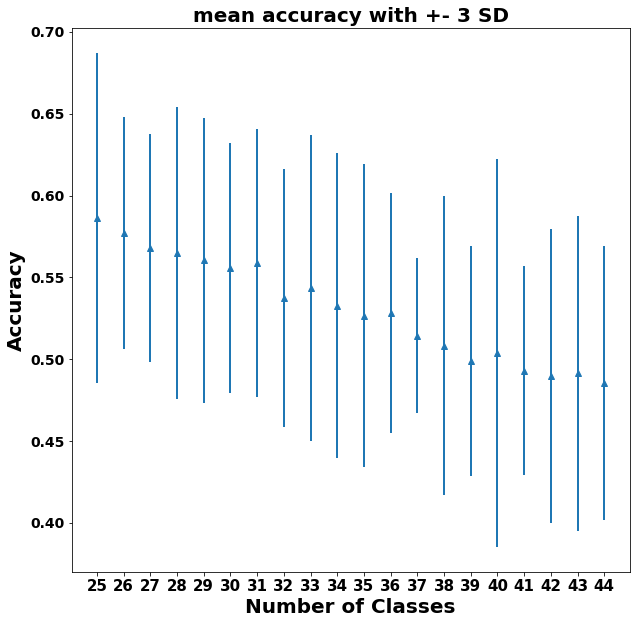

In [105]:
# create a plot
plt.figure(figsize = (10,10))
plt.errorbar(df["num_classes"],np.array(all_results)[:,1], 
             err_ranges, linestyle='None', marker='^', linewidth = 2)
plt.xlabel("Number of Classes", weight = "bold", fontsize = 20)
plt.ylabel("Accuracy", weight = "bold", fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(df["num_classes"])
counter = 1
plt.title("mean accuracy with +- 3 SD", weight = "bold", fontsize = 20)
# for text in coverage: 
#     plt.text(counter, 1, text)
#     counter+=1
plt.show()

In [106]:
# make a new column for coverage
df["coverage"] = coverage

In [107]:
df["num_classes"] = df["num_classes"]  + 1

In [108]:
df

,num_classes,mean_accuracy,std_error_accuracy,coverage
0,26,0.586501,0.033572,0.58
1,27,0.577319,0.023667,0.59
2,28,0.568124,0.023212,0.6
3,29,0.565038,0.029811,0.61
4,30,0.560450,0.028985,0.62
5,31,0.555863,0.025519,0.63
6,32,0.558942,0.027259,0.64
7,33,0.537479,0.026223,0.65
8,34,0.543603,0.031146,0.65
9,35,0.532871,0.031134,0.66


## remove multiple substrates

In [51]:
# generic function that takes in the data and number of classes
def model_by_classes(num_classes, data, both = False, split_on_bar = False): 
    # get the frequency counts
    all_classes = list(data.low_level_substr.value_counts().keys())
    # remove multiple substrates
#     all_classes = [classes for classes in all_classes if classes not in ["multiple_substrates"]]
    # suppose using the top 2
    keep_these_many = num_classes
    # top_k_classes
    top_k = all_classes[:keep_these_many]
    # not top two
    not_top_k = [target for target in all_classes if target not in top_k]
    # get the data for the top k classes
    top_k_data = data[data.low_level_substr.isin(top_k)].reset_index(drop = True)
    # get the data for the non top_k classes
    not_top_k_data = data[data.low_level_substr.isin(not_top_k)].reset_index(drop = True)
    # give the same label to all the targets of the not_top_k_data
    not_top_k_data["low_level_substr"] = "other"
    # stack the top k and the not top k data together
    all_data = pd.concat([top_k_data, not_top_k_data], ignore_index = True)
    
    if split_on_bar == False:
        # instantiate the vectorizer again
        vectorizer = CountVectorizer(tokenizer=lambda x: str(x).split(','), lowercase = False)
    
    else: 
        vectorizer = CountVectorizer(tokenizer=lambda x: str(x).replace("|", ",").split(','), lowercase = False)
    
    # pipeline
    clf = Pipeline([('countvectorizer',vectorizer),('rf',RandomForestClassifier(n_jobs = 6))])
    # Parameters of pipelines can be set using ‘__’ separated parameter names:
    param_grid = {
    'countvectorizer__min_df': [1,2],
    'rf__n_estimators': [100,200,400], 
    'rf__max_features': ["auto", "log2"]
    }
    # fit the search
    search = GridSearchCV(clf, param_grid, n_jobs=7 , verbose = 3, cv = 5, scoring = "accuracy")
    
    # if both gene seq and category seq
    
    if both == True: 
        # fit the grid search
        search.fit(all_data["sig_gene_seq"] + "," + all_data["category_sequence"], all_data["low_level_substr"])
    else: 
        search.fit(all_data["sig_gene_seq"], all_data["low_level_substr"])
    # best score
    best_score = search.best_score_
    # std error
    std_accuracy = search.cv_results_['std_test_score'][np.argmax(search.cv_results_['mean_test_score'])]
    vectorizer.fit_transform(all_data["sig_gene_seq"])
    print(len(vectorizer.vocabulary_))
    return num_classes, best_score, std_accuracy

In [52]:
# functions that can help us do parallel computation
from joblib import Parallel, delayed

### only using gene data and not splitting on bar ("|")

In [53]:
# run the function in parallel
all_results = Parallel(n_jobs=7, verbose = 2)(delayed(model_by_classes)(i, data, False, False) for i in range(1, 10))

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   6 out of   9 | elapsed:   45.6s remaining:   22.8s
[Parallel(n_jobs=7)]: Done   9 out of   9 | elapsed:  1.2min finished


In [54]:
# get the error ranges
err_ranges = np.array(all_results)[:,2]*3

In [55]:
# put everything in a dataframe
df = pd.DataFrame(all_results)

In [56]:
# give column names
df.columns = ["num_classes", "mean_accuracy", "std_error_accuracy"]

In [57]:
# how much data do these classes cover
coverage = pd.DataFrame(data.high_level_substr.value_counts().cumsum()/data.high_level_substr.value_counts().cumsum()[-1])["high_level_substr"].values[1:10]

In [221]:
# round the coverage
coverage = np.round(coverage,2).astype(str)

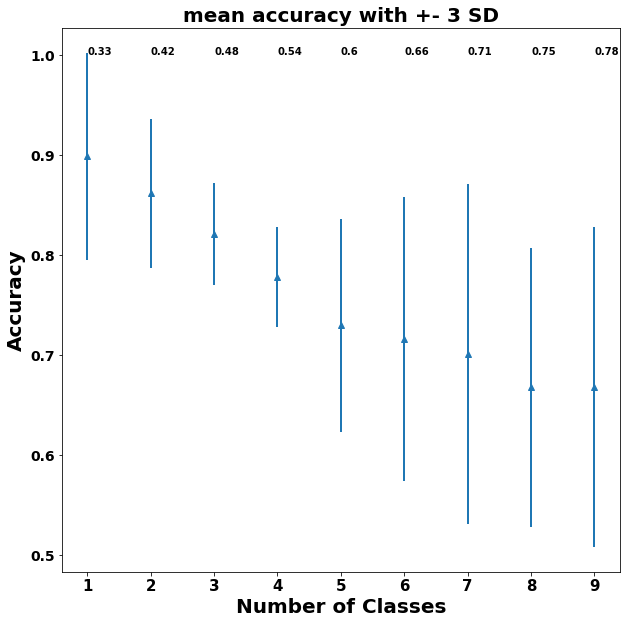

In [222]:
# create a plot
plt.figure(figsize = (10,10))
plt.errorbar(df["num_classes"],np.array(all_results)[:,1], 
             err_ranges, linestyle='None', marker='^', linewidth = 2)
plt.xlabel("Number of Classes", weight = "bold", fontsize = 20)
plt.ylabel("Accuracy", weight = "bold", fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(df["num_classes"])
counter = 1
plt.title("mean accuracy with +- 3 SD", weight = "bold", fontsize = 20)
for text in coverage: 
    plt.text(counter, 1, text)
    counter+=1
plt.show()

In [223]:
# make a new column for coverage
df["coverage"] = coverage

In [224]:
df["num_classes"] = df["num_classes"]  + 1

In [225]:
df

,num_classes,mean_accuracy,std_error_accuracy,coverage
0,2,0.899029,0.034517,0.33
1,3,0.862136,0.024867,0.42
2,4,0.821359,0.016928,0.48
3,5,0.778641,0.016704,0.54
4,6,0.730097,0.035487,0.6
5,7,0.716505,0.047324,0.66
6,8,0.700971,0.056744,0.71
7,9,0.667961,0.046521,0.75
8,10,0.667961,0.053319,0.78


We could decide to work with the top 2 or 3 most frequent classes because those models have an accuracy of over 70% but the issue is that the top 2 or 3 most frequent classes only cover about ~50% of the data which I do not think is enough coverage.

We got some more data which essentially maps each gene to a reference. We will do the same kind of exercise as done above, but with the addition of this signature gene reference data.

### only using gene data and splitting on bar ("|")

In [226]:
# run the function in parallel
all_results = Parallel(n_jobs=7, verbose = 2)(delayed(model_by_classes)(i, data, False, True) for i in range(1, 10))

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   6 out of   9 | elapsed:   47.4s remaining:   23.7s
[Parallel(n_jobs=7)]: Done   9 out of   9 | elapsed:  1.2min finished


In [227]:
# get the error ranges
err_ranges = np.array(all_results)[:,2]*3

In [228]:
# put everything in a dataframe
df = pd.DataFrame(all_results)

In [229]:
# give column names
df.columns = ["num_classes", "mean_accuracy", "std_error_accuracy"]

In [230]:
# how much data do these classes cover
coverage = pd.DataFrame(data.high_level_substr.value_counts().cumsum()/data.high_level_substr.value_counts().cumsum()[-1])["high_level_substr"].values[1:10]

In [231]:
# round the coverage
coverage = np.round(coverage,2).astype(str)

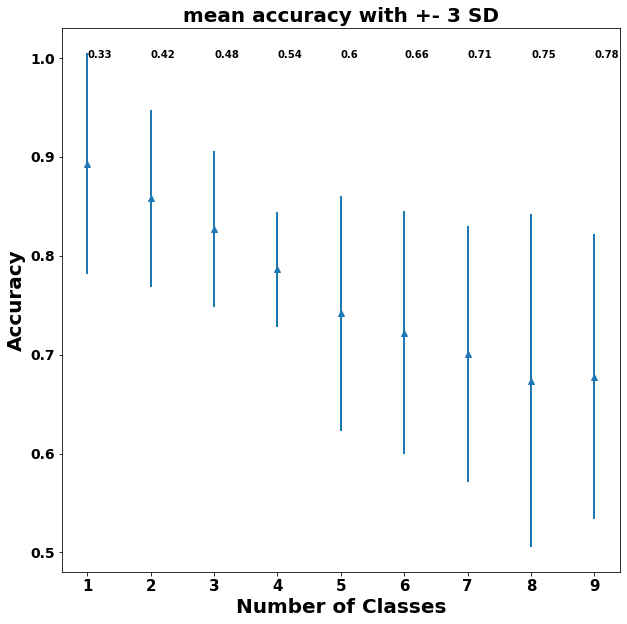

In [232]:
# create a plot
plt.figure(figsize = (10,10))
plt.errorbar(df["num_classes"],np.array(all_results)[:,1], 
             err_ranges, linestyle='None', marker='^', linewidth = 2)
plt.xlabel("Number of Classes", weight = "bold", fontsize = 20)
plt.ylabel("Accuracy", weight = "bold", fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(df["num_classes"])
counter = 1
plt.title("mean accuracy with +- 3 SD", weight = "bold", fontsize = 20)
for text in coverage: 
    plt.text(counter, 1, text)
    counter+=1
plt.show()

In [233]:
# make a new column for coverage
df["coverage"] = coverage

In [234]:
df["num_classes"] = df["num_classes"]  + 1

In [235]:
df

,num_classes,mean_accuracy,std_error_accuracy,coverage
0,2,0.893204,0.037350,0.33
1,3,0.858252,0.029830,0.42
2,4,0.827184,0.026339,0.48
3,5,0.786408,0.019417,0.54
4,6,0.741748,0.039604,0.6
5,7,0.722330,0.041007,0.66
6,8,0.700971,0.043157,0.71
7,9,0.673786,0.056143,0.75
8,10,0.677670,0.048115,0.78


We could decide to work with the top 2 or 3 most frequent classes because those models have an accuracy of over 70% but the issue is that the top 2 or 3 most frequent classes only cover about ~50% of the data which I do not think is enough coverage.

We got some more data which essentially maps each gene to a reference. We will do the same kind of exercise as done above, but with the addition of this signature gene reference data.

## adding the metadata

In [236]:
# read the signature gene reference data
sig_gene_reference = pd.read_csv(r"signature_gene_reference.tsv", sep = "\t", header = None)

In [237]:
# name the columns
sig_gene_reference.columns = ["category", "gene"]

In [238]:
# first few rows of the data
sig_gene_reference.head()

,category,gene
0,CAZyme,AA0
1,CAZyme,AA10
2,CAZyme,AA1_3
3,CAZyme,AA2
4,CAZyme,AA3


In [239]:
# what are the distinctive categories
sig_gene_reference["category"].value_counts()

TC        525
CAZyme    499
STP       176
TF         47
Name: category, dtype: int64

In [240]:
# write a function to map the genes to the category
def map_genes_to_categories(sequence): 
    # instantiate an empty string
    category_sequence = ""
    # the category data has individual genes like A and B and not A|B
    # thus to have all the genes mapped we would need to replace "|" by ","
    
    # replace "|" with a "," and then split on the ","
    # iterate over all those genes
    for gene in str(sequence).replace("|", ",").split(","):
        # map out the category reference for the gene
        categories = sig_gene_reference[sig_gene_reference["gene"] == gene]["category"].values
        # sometimes one gene can have different categories
        # in such a case loop over the multiple categories found
        for i in categories: 
            # iteratively add to the empty string
#             if len(i) > 0:
            category_sequence = category_sequence + "," + i
    # there would be a weird comma at the very start character
    # remove that and keep the rest
    return category_sequence[1:]

In [241]:
from tqdm.notebook import tqdm

In [242]:
category_sequence = []
for sequence in tqdm(data["sig_gene_seq"].values): 
    category_sequence.append(map_genes_to_categories(sequence))

  0%|          | 0/653 [00:00<?, ?it/s]

In [243]:
data["category_sequence"] = category_sequence

In [244]:
data.head()

,PULid,sig_gene_seq,low_level_substr,high_level_substr,Pub_year,category_sequence
0,PUL0001,"GH1,8.A.49,CE2,GH130,GH130,3.A.1,3.A.1,SBP_bac_1,LacI,GH36,GH113",beta-mannan,beta-mannan,2019,"CAZyme,CAZyme,CAZyme,CAZyme,TC,TC,STP,STP,TF,CAZyme,CAZyme"
1,PUL0002,GH16,lichenan,beta-glucan,1996,CAZyme
2,PUL0003,"GH30_8,GH43_16|CBM6",xylan,xylan,2016,"CAZyme,CAZyme,CAZyme"
3,PUL0004,"4.A.1,GH1","glucose,cellobiose,maltose",multiple_substrates,2016,"TC,CAZyme"
4,PUL0005,"GH94,GH3","beta-glucan,sophorose,laminaribiose",multiple_substrates,2016,"CAZyme,CAZyme"


### Using both gene and category data and not splitting on bar ("|")

In [245]:
# run the function in parallel
all_results = Parallel(n_jobs=7, verbose = 2)(delayed(model_by_classes)(i, data, True, False) for i in range(1, 10))

# get the error ranges
err_ranges = np.array(all_results)[:,2]*3

# put everything in a dataframe
df = pd.DataFrame(all_results)

# give column names
df.columns = ["num_classes", "mean_accuracy", "std_error_accuracy"]

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   6 out of   9 | elapsed:   48.8s remaining:   24.3s
[Parallel(n_jobs=7)]: Done   9 out of   9 | elapsed:  1.2min finished


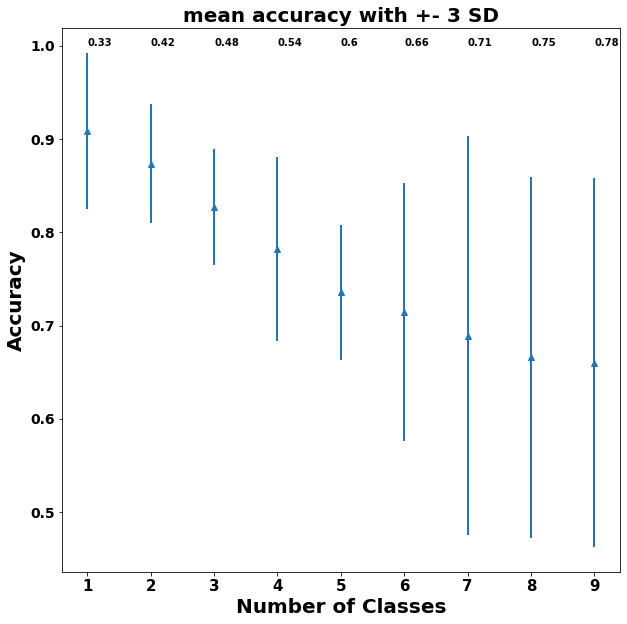

In [246]:
# how much data do these classes cover
coverage = pd.DataFrame(data.high_level_substr.value_counts().cumsum()/data.high_level_substr.value_counts().cumsum()[-1])["high_level_substr"].values[1:10]

# round the coverage
coverage = np.round(coverage,2).astype(str)

# create a plot
plt.figure(figsize = (10,10))
plt.errorbar(df["num_classes"],np.array(all_results)[:,1], 
             err_ranges, linestyle='None', marker='^', linewidth = 2)
plt.xlabel("Number of Classes", weight = "bold", fontsize = 20)
plt.ylabel("Accuracy", weight = "bold", fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(df["num_classes"])
counter = 1
plt.title("mean accuracy with +- 3 SD", weight = "bold", fontsize = 20)
for text in coverage: 
    plt.text(counter, 1, text)
    counter+=1
plt.show()

In [247]:
# make a new column for coverage
df["coverage"] = coverage

df["num_classes"] = df["num_classes"]  + 1

df

,num_classes,mean_accuracy,std_error_accuracy,coverage
0,2,0.908738,0.027869,0.33
1,3,0.873786,0.021271,0.42
2,4,0.827184,0.020732,0.48
3,5,0.782524,0.032838,0.54
4,6,0.735922,0.024096,0.6
5,7,0.714563,0.046196,0.66
6,8,0.689320,0.071344,0.71
7,9,0.666019,0.064576,0.75
8,10,0.660194,0.065848,0.78


### Using both gene and category data and splitting on bar ("|")

In [248]:
# let's focus on this one
data["sig_gene_seq"].values[2]

'GH30_8,GH43_16|CBM6'

In [249]:
# This is what we have been doing so far
data["sig_gene_seq"].values[2].split(",")

['GH30_8', 'GH43_16|CBM6']

In [250]:
# Or could there be some basis for doing something like this as well?
data["sig_gene_seq"].values[2].replace("|", ",").split(",")

['GH30_8', 'GH43_16', 'CBM6']

In [251]:
# run the function in parallel
all_results = Parallel(n_jobs=7, verbose = 2)(delayed(model_by_classes)(i, data, True, True) for i in range(1, 10))

# get the error ranges
err_ranges = np.array(all_results)[:,2]*3

# put everything in a dataframe
df = pd.DataFrame(all_results)

# give column names
df.columns = ["num_classes", "mean_accuracy", "std_error_accuracy"]

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   6 out of   9 | elapsed:   48.8s remaining:   24.3s
[Parallel(n_jobs=7)]: Done   9 out of   9 | elapsed:  1.3min finished


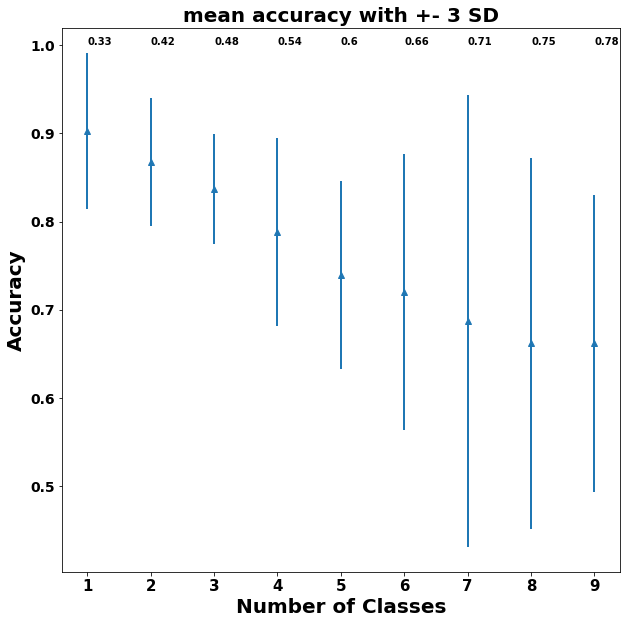

In [252]:
# how much data do these classes cover
coverage = pd.DataFrame(data.high_level_substr.value_counts().cumsum()/data.high_level_substr.value_counts().cumsum()[-1])["high_level_substr"].values[1:10]

# round the coverage
coverage = np.round(coverage,2).astype(str)

# create a plot
plt.figure(figsize = (10,10))
plt.errorbar(df["num_classes"],np.array(all_results)[:,1], 
             err_ranges, linestyle='None', marker='^', linewidth = 2)
plt.xlabel("Number of Classes", weight = "bold", fontsize = 20)
plt.ylabel("Accuracy", weight = "bold", fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(df["num_classes"])
counter = 1
plt.title("mean accuracy with +- 3 SD", weight = "bold", fontsize = 20)
for text in coverage: 
    plt.text(counter, 1, text)
    counter+=1
plt.show()

In [253]:
# make a new column for coverage
df["coverage"] = coverage

df["num_classes"] = df["num_classes"]  + 1

df

,num_classes,mean_accuracy,std_error_accuracy,coverage
0,2,0.902913,0.029448,0.33
1,3,0.867961,0.024252,0.42
2,4,0.836893,0.020732,0.48
3,5,0.788350,0.035487,0.54
4,6,0.739806,0.035487,0.6
5,7,0.720388,0.052247,0.66
6,8,0.687379,0.085393,0.71
7,9,0.662136,0.070118,0.75
8,10,0.662136,0.056076,0.78


Therefore, the roadmap we will use is, we would have a classification model that can classify sequences into these top 6 most frequent classes. We would also have an unknown class in the mix which the model would classify a sequence into if it is not sure. 

## Implementing the roadmap

### use only gene data, no metadata and split on bars as well

### RandomForest Supervised Learning Model

In [552]:
# import train test split
from sklearn.model_selection import train_test_split

In [553]:
data = data[~data["high_level_substr"].isin(["multiple_substrates"])]

In [554]:
# make a train and test set
X_train, X_test, y_train, y_test = train_test_split(data["sig_gene_seq"], data["high_level_substr"],
                                                    test_size=0.40, random_state=42)

In [558]:
# generic function that takes in the data and number of classes
def model_by_classes(num_classes, data, both = False, split_on_bar = False): 
    # get the frequency counts
    all_classes = list(data.high_level_substr.value_counts().keys())
    # remove multiple substrates
    all_classes = [classes for classes in all_classes if classes not in ["multiple_substrates"]]
    # suppose using the top 2
    keep_these_many = num_classes
    # top_k_classes
    top_k = all_classes[:keep_these_many]
    # not top two
    not_top_k = [target for target in all_classes if target not in top_k]
    # get the data for the top k classes
    top_k_data = data[data.high_level_substr.isin(top_k)].reset_index(drop = True)
    # get the data for the non top_k classes
    not_top_k_data = data[data.high_level_substr.isin(not_top_k)].reset_index(drop = True)
    # give the same label to all the targets of the not_top_k_data
    not_top_k_data["high_level_substr"] = "other"
    # stack the top k and the not top k data together
    all_data = pd.concat([top_k_data, not_top_k_data], ignore_index = True)
    
    if split_on_bar == False:
        # instantiate the vectorizer again
        vectorizer = CountVectorizer(tokenizer=lambda x: str(x).split(','), lowercase = False)
    
    else: 
        vectorizer = CountVectorizer(tokenizer=lambda x: str(x).replace("|", ",").split(','), lowercase = False)
    
    # pipeline
    clf = Pipeline([('countvectorizer',vectorizer),('rf',RandomForestClassifier(n_jobs = 6))])
    # Parameters of pipelines can be set using ‘__’ separated parameter names:
    param_grid = {
    'countvectorizer__min_df': [1,2],
    'rf__n_estimators': [100,200,400], 
    'rf__max_features': ["auto", "log2"]
    }
    # fit the search
    search = GridSearchCV(clf, param_grid, n_jobs=7 , verbose = 3, cv = 5, scoring = "accuracy")
    
    # if both gene seq and category seq
    
    if both == True: 
        # fit the grid search
        search.fit(all_data["sig_gene_seq"] + "," + all_data["category_sequence"], all_data["high_level_substr"])
    else: 
        search.fit(all_data["sig_gene_seq"], all_data["high_level_substr"])
    # best score
    best_score = search.best_score_
    # std error
    std_accuracy = search.cv_results_['std_test_score'][np.argmax(search.cv_results_['mean_test_score'])]
    vectorizer.fit_transform(all_data["sig_gene_seq"])
    print(len(vectorizer.vocabulary_))
    return num_classes, best_score, std_accuracy, search.best_estimator_, top_k, not_top_k, vectorizer

In [559]:
data_train = pd.concat([pd.DataFrame(X_train.values), pd.DataFrame(y_train.values)], ignore_index = True, axis = 1)

In [560]:
data_train.columns = ["sig_gene_seq", "high_level_substr"]

In [561]:
# use the function with 6 classes and only train data
num_classes, best_score, std_accuracy, best_estimator_, top_k, not_top_k, vectorizer = model_by_classes(5, data_train, False, True)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
323


In [562]:
# best score and std error
best_score, std_accuracy

(0.7995240613432048, 0.035494233080083606)

In [563]:
best_estimator = best_estimator_

In [564]:
# column change the original targets to top 6 + unknown
targets_train = [target if target in top_k else "other" for target in data_train["high_level_substr"]]

In [565]:
vectorizer = vectorizer

In [566]:
# refit this best estimator
best_estimator.fit(data_train[["sig_gene_seq"]].values, targets_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(lowercase=False,
                                 tokenizer=<function model_by_classes.<locals>.<lambda> at 0x00000163396E2EE0>)),
                ('rf', RandomForestClassifier(n_estimators=400, n_jobs=6))])

In [497]:
# accuracy_score(targets_train, best_estimator.predict(data_train[["sig_gene_seq"]].values))

In [567]:
# get the predictions for test
y_test_pred = best_estimator.predict(X_test.values)

In [75]:
# get the confusion matrix 

In [568]:
from sklearn.metrics import confusion_matrix

In [569]:
# column change the original targets to top 6 + unknown
targets_test = [target if target in top_k else "other" for target in y_test]

In [570]:
data_test = pd.concat([pd.DataFrame(X_test.values), pd.DataFrame(targets_test)], ignore_index = True, axis = 1)

In [571]:
data_test.columns = ["sig_gene_seq", "high_level_substr"]

In [438]:
# column change the original targets to top 6 + unknown
# targets_test = [target if target in top_k else "other" for target in data_test["high_level_substr"]]

In [572]:
# get the array oaf confusion matrix
cm = confusion_matrix(targets_test, y_test_pred)

In [573]:
# dataframe for confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in best_estimator.classes_],
                  columns = [i for i in best_estimator.classes_])

In [574]:
# seaborn that helps with aesthetically pleasing plots
import seaborn as sns

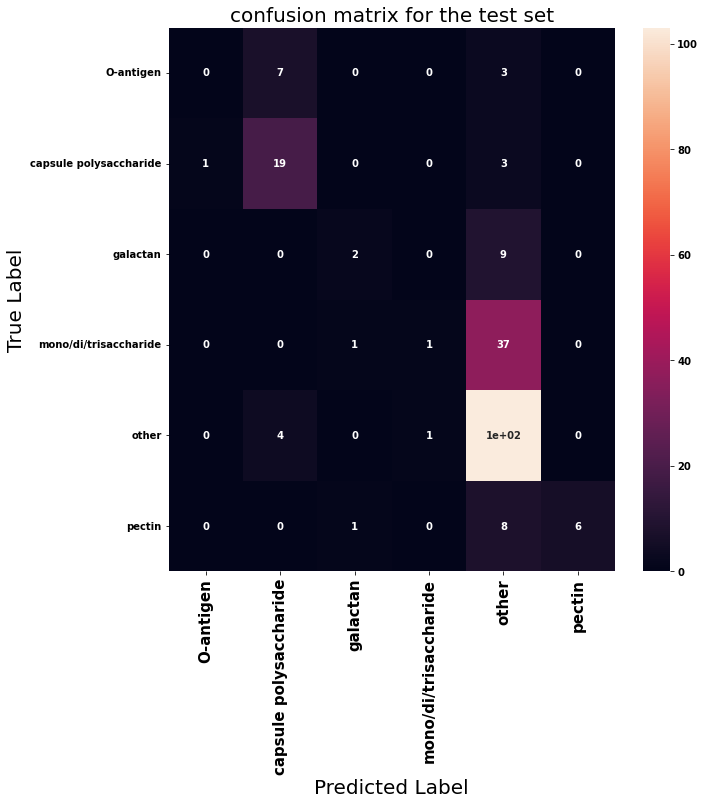

In [575]:
# make the plot
plt.figure(figsize = (10, 10))
sns.heatmap(df_cm, annot = True)
plt.title("confusion matrix for the test set", fontsize = 20)
plt.xlabel("Predicted Label", fontsize = 20)
plt.ylabel("True Label", fontsize = 20)
plt.show()


In [576]:
from sklearn.metrics import accuracy_score

In [577]:
accuracy_score(targets_test, y_test_pred)

0.6359223300970874

So far, we have a trained random forest classifier which can classify new sequences into the top 6 most frequent classes and an unknown class if it is not sure.

In [578]:
top_k

['mono/di/trisaccharide',
 'capsule polysaccharide',
 'O-antigen',
 'galactan',
 'pectin']

In [579]:
data[data["high_level_substr"] == 'mono/di/trisaccharide']

,PULid,sig_gene_seq,low_level_substr,high_level_substr,Pub_year
14,PUL0015,"SIS,GH9,4.A.3",cellobiose,mono/di/trisaccharide,2017
15,PUL0016,"4.A.3,4.A.3,HTH_6|SIS,4.A.3,GH1",cellobiose,mono/di/trisaccharide,2017
16,PUL0017,"GH94,3.A.1,3.A.1,SBP_bac_1,HTH_AraC,8.A.59,SBP_bac_1,3.A.9",cellobiose,mono/di/trisaccharide,2017
21,PUL0022,"Mga|HTH_11,GH1,4.A.3,4.A.3",cellobiose,mono/di/trisaccharide,2018
22,PUL0023,"GH1,4.A.3,4.A.3",cellobiose,mono/di/trisaccharide,2018
...,...,...,...,...,...
580,PUL0583,"4.A.3,4.A.3,CE0,4.A.3",cellobiose,mono/di/trisaccharide,1993
581,PUL0584,"GH13_18,3.A.1,3.A.1,3.A.1,HTH_AraC,GH36,LacI",melibiose,mono/di/trisaccharide,2013
582,PUL0585,"GH1,2.A.123,Mga|HTH_11,4.A.3,4.A.3",cellobiose,mono/di/trisaccharide,2011
595,PUL0598,GH95,xylose,mono/di/trisaccharide,2015


In [581]:
data[data["high_level_substr"] == 'mono/di/trisaccharide']["low_level_substr"].value_counts()

cellobiose                                                 14
sucrose                                                    12
lactose                                                    11
raffinose                                                   5
beta-glucoside                                              4
4-methylumbelliferyl 6-azido-6-deoxy-beta-D-galactoside     3
maltose                                                     3
melibiose                                                   3
trehalose                                                   2
chitobiose                                                  2
arabinose                                                   2
xylose                                                      2
ribose                                                      2
sialic acid                                                 2
fucose                                                      2
gentiobiose                                                 1
mannose 

In [590]:
# import train test split
from sklearn.model_selection import train_test_split

In [591]:
data = data[~data["high_level_substr"].isin(["multiple_substrates", 'mono/di/trisaccharide'])]

In [592]:
# make a train and test set
X_train, X_test, y_train, y_test = train_test_split(data["sig_gene_seq"], data["high_level_substr"],
                                                    test_size=0.40, random_state=42)

In [593]:
# generic function that takes in the data and number of classes
def model_by_classes(num_classes, data, both = False, split_on_bar = False): 
    # get the frequency counts
    all_classes = list(data.high_level_substr.value_counts().keys())
    # remove multiple substrates
    all_classes = [classes for classes in all_classes if classes not in ["multiple_substrates"]]
    # suppose using the top 2
    keep_these_many = num_classes
    # top_k_classes
    top_k = all_classes[:keep_these_many]
    # not top two
    not_top_k = [target for target in all_classes if target not in top_k]
    # get the data for the top k classes
    top_k_data = data[data.high_level_substr.isin(top_k)].reset_index(drop = True)
    # get the data for the non top_k classes
    not_top_k_data = data[data.high_level_substr.isin(not_top_k)].reset_index(drop = True)
    # give the same label to all the targets of the not_top_k_data
    not_top_k_data["high_level_substr"] = "other"
    # stack the top k and the not top k data together
    all_data = pd.concat([top_k_data, not_top_k_data], ignore_index = True)
    
    if split_on_bar == False:
        # instantiate the vectorizer again
        vectorizer = CountVectorizer(tokenizer=lambda x: str(x).split(','), lowercase = False)
    
    else: 
        vectorizer = CountVectorizer(tokenizer=lambda x: str(x).replace("|", ",").split(','), lowercase = False)
    
    # pipeline
    clf = Pipeline([('countvectorizer',vectorizer),('rf',RandomForestClassifier(n_jobs = 6))])
    # Parameters of pipelines can be set using ‘__’ separated parameter names:
    param_grid = {
    'countvectorizer__min_df': [1,2],
    'rf__n_estimators': [100,200,400], 
    'rf__max_features': ["auto", "log2"]
    }
    # fit the search
    search = GridSearchCV(clf, param_grid, n_jobs=7 , verbose = 3, cv = 5, scoring = "accuracy")
    
    # if both gene seq and category seq
    
    if both == True: 
        # fit the grid search
        search.fit(all_data["sig_gene_seq"] + "," + all_data["category_sequence"], all_data["high_level_substr"])
    else: 
        search.fit(all_data["sig_gene_seq"], all_data["high_level_substr"])
    # best score
    best_score = search.best_score_
    # std error
    std_accuracy = search.cv_results_['std_test_score'][np.argmax(search.cv_results_['mean_test_score'])]
    vectorizer.fit_transform(all_data["sig_gene_seq"])
    print(len(vectorizer.vocabulary_))
    return num_classes, best_score, std_accuracy, search.best_estimator_, top_k, not_top_k, vectorizer

In [594]:
data_train = pd.concat([pd.DataFrame(X_train.values), pd.DataFrame(y_train.values)], ignore_index = True, axis = 1)

In [595]:
data_train.columns = ["sig_gene_seq", "high_level_substr"]

In [597]:
data.shape

(437, 5)

In [598]:
# use the function with 6 classes and only train data
num_classes, best_score, std_accuracy, best_estimator_, top_k, not_top_k, vectorizer = model_by_classes(5, data_train, False, True)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
315


In [599]:
# best score and std error
best_score, std_accuracy

(0.7978955007256893, 0.024201496855558474)

In [600]:
best_estimator = best_estimator_

In [601]:
# column change the original targets to top 6 + unknown
targets_train = [target if target in top_k else "other" for target in data_train["high_level_substr"]]

In [602]:
vectorizer = vectorizer

In [603]:
# refit this best estimator
best_estimator.fit(data_train[["sig_gene_seq"]].values, targets_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(lowercase=False, min_df=2,
                                 tokenizer=<function model_by_classes.<locals>.<lambda> at 0x00000163396E2AF0>)),
                ('rf', RandomForestClassifier(n_estimators=200, n_jobs=6))])

In [497]:
# accuracy_score(targets_train, best_estimator.predict(data_train[["sig_gene_seq"]].values))

In [604]:
# get the predictions for test
y_test_pred = best_estimator.predict(X_test.values)

In [75]:
# get the confusion matrix 

In [605]:
from sklearn.metrics import confusion_matrix

In [606]:
# column change the original targets to top 6 + unknown
targets_test = [target if target in top_k else "other" for target in y_test]

In [607]:
data_test = pd.concat([pd.DataFrame(X_test.values), pd.DataFrame(targets_test)], ignore_index = True, axis = 1)

In [608]:
data_test.columns = ["sig_gene_seq", "high_level_substr"]

In [438]:
# column change the original targets to top 6 + unknown
# targets_test = [target if target in top_k else "other" for target in data_test["high_level_substr"]]

In [609]:
# get the array oaf confusion matrix
cm = confusion_matrix(targets_test, y_test_pred)

In [610]:
# dataframe for confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in best_estimator.classes_],
                  columns = [i for i in best_estimator.classes_])

In [611]:
# seaborn that helps with aesthetically pleasing plots
import seaborn as sns

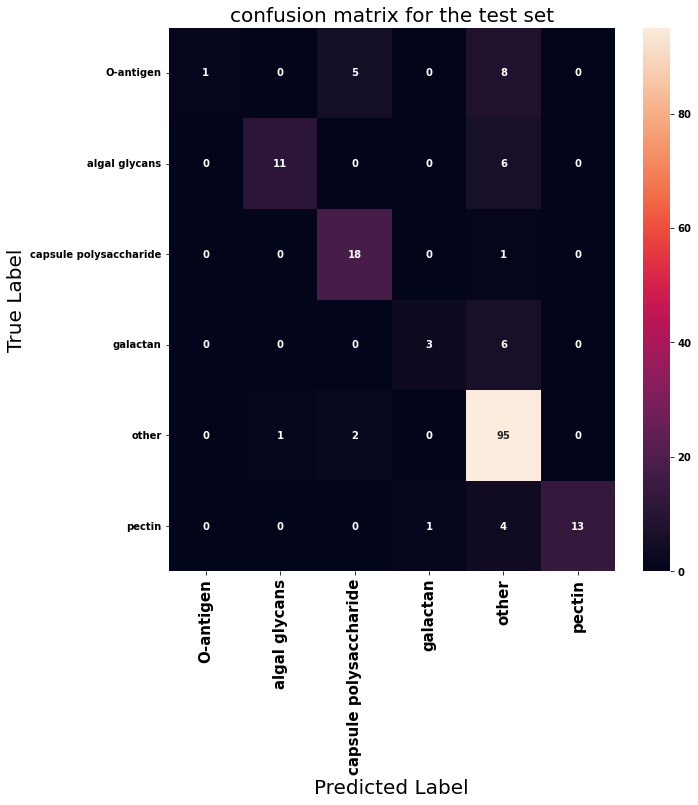

In [612]:
# make the plot
plt.figure(figsize = (10, 10))
sns.heatmap(df_cm, annot = True)
plt.title("confusion matrix for the test set", fontsize = 20)
plt.xlabel("Predicted Label", fontsize = 20)
plt.ylabel("True Label", fontsize = 20)
plt.show()


In [613]:
from sklearn.metrics import accuracy_score

In [614]:
accuracy_score(targets_test, y_test_pred)

0.8057142857142857

So far, we have a trained random forest classifier which can classify new sequences into the top 6 most frequent classes and an unknown class if it is not sure.

In [615]:
top_k

['capsule polysaccharide', 'galactan', 'algal glycans', 'O-antigen', 'pectin']

### K Nearest Neighbors

In [509]:
from sklearn.neighbors import KNeighborsClassifier

In [510]:
# generic function that takes in the data and number of classes
def model_by_classes(num_classes, data, both = True, split_on_bar = False): 
    # get the frequency counts
    all_classes = list(data.high_level_substr.value_counts().keys())
    # remove multiple substrates
    all_classes = [classes for classes in all_classes if classes not in ["multiple_substrates"]]
    # suppose using the top 2
    keep_these_many = num_classes
    # top_k_classes
    top_k = all_classes[:keep_these_many]
    # not top two
    not_top_k = [target for target in all_classes if target not in top_k]
    # get the data for the top k classes
    top_k_data = data[data.high_level_substr.isin(top_k)].reset_index(drop = True)
    # get the data for the non top_k classes
    not_top_k_data = data[data.high_level_substr.isin(not_top_k)].reset_index(drop = True)
    # give the same label to all the targets of the not_top_k_data
    not_top_k_data["high_level_substr"] = "other"
    # stack the top k and the not top k data together
    all_data = pd.concat([top_k_data, not_top_k_data], ignore_index = True)
    
    if split_on_bar == False:
        # instantiate the vectorizer again
        vectorizer = CountVectorizer(tokenizer=lambda x: str(x).split(','), lowercase = False)
    
    else: 
        vectorizer = CountVectorizer(tokenizer=lambda x: str(x).replace("|", ",").split(','), lowercase = False)
    
    # pipeline
    clf = Pipeline([('countvectorizer',vectorizer),('nn',KNeighborsClassifier(n_jobs = 6))])
    # Parameters of pipelines can be set using ‘__’ separated parameter names:
    param_grid = {
    'countvectorizer__min_df': [1,2],
    'nn__n_neighbors': [5, 10, 15], 
    'nn__weights': ["uniform", "distance"]
    }
    # fit the search
    search = GridSearchCV(clf, param_grid, n_jobs=7 , verbose = 3, cv = 5, scoring = "accuracy")
    
    # if both gene seq and category seq
    
    if both == True: 
        # fit the grid search
        search.fit(all_data["sig_gene_seq"] + "," + all_data["category_sequence"], all_data["high_level_substr"])
    else: 
        search.fit(all_data["sig_gene_seq"], all_data["high_level_substr"])
    # best score
    best_score = search.best_score_
    # std error
    std_accuracy = search.cv_results_['std_test_score'][np.argmax(search.cv_results_['mean_test_score'])]
    return num_classes, best_score, std_accuracy, search.best_estimator_, top_k, not_top_k

In [511]:
data_train = pd.concat([pd.DataFrame(X_train.values), pd.DataFrame(y_train.values)], ignore_index = True, axis = 1)

In [512]:
data_train.columns = ["sig_gene_seq", "high_level_substr"]

In [513]:
# use the function with 6 classes and only train data
num_classes, best_score, std_accuracy, best_estimator_, top_k, not_top_k = model_by_classes(6, data_train, False, True)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [514]:
# best score and std error
best_score, std_accuracy

(0.695928080380751, 0.026390750702335652)

In [515]:
best_estimator_

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(lowercase=False, min_df=2,
                                 tokenizer=<function model_by_classes.<locals>.<lambda> at 0x000001633C243AF0>)),
                ('nn',
                 KNeighborsClassifier(n_jobs=6, n_neighbors=10,
                                      weights='distance'))])

### Will SMOTE help?

In [263]:
from imblearn.over_sampling import SMOTE 

In [264]:
sm = SMOTE(random_state=42)

In [265]:
vectorizer = CountVectorizer(tokenizer=lambda x: str(x).split(','), lowercase = False)

In [270]:
vectorizer.fit(data_train["sig_gene_seq"])

CountVectorizer(lowercase=False,
                tokenizer=<function <lambda> at 0x0000029D16194820>)

In [271]:
vectorizer.vocabulary_

{'HTH_psq': 359,
 'GH5_2': 278,
 '3.A.3': 40,
 'HMA': 344,
 'Aminotran_1_2': 79,
 'HTH_3': 352,
 'Trans_reg_C': 426,
 'HisKA|HATPase_c': 361,
 'MerR': 367,
 'Sigma70_r4_2': 420,
 'HTH_AraC': 356,
 '8.A.59': 56,
 '3.A.1': 37,
 'GH67': 293,
 'GH10': 133,
 'GH43_12': 242,
 'GH31': 226,
 '1.B.14': 4,
 'GH19': 207,
 '8.A.46': 53,
 'GH20': 209,
 '2.A.66': 32,
 'GT4': 329,
 'AraC_binding': 80,
 'GT4|GT4': 331,
 'GH16': 188,
 'HTH_18': 347,
 'GntR': 339,
 '2.A.1': 16,
 'GT2': 323,
 'GH166': 190,
 '2.A.21': 23,
 'GH130': 151,
 'GH26': 210,
 'GH2': 208,
 'GH3': 219,
 'HisKA': 360,
 'Sigma70_r4_2|Sigma70_r2': 421,
 'GH28': 214,
 '8.A.9': 57,
 'GH97': 311,
 'GH13_18': 161,
 'LacI': 363,
 '9.B.67': 72,
 'GH36': 232,
 'HTH_11': 346,
 'GH13_19': 162,
 'GH13_38': 170,
 'GH13': 150,
 'GH65': 291,
 '2.A.2': 22,
 'GH1': 132,
 '2.A.123': 20,
 'Mga|HTH_11': 368,
 '4.A.3': 46,
 'GH53': 273,
 'GH13_31': 168,
 'GH4': 236,
 '8.A.3': 52,
 '1.B.18': 5,
 '9.B.18': 64,
 'PfkB': 407,
 'PL7': 399,
 'PL17_2|PL17': 38

In [272]:
X_train_seq = vectorizer.transform(data_train["sig_gene_seq"])

In [273]:
X_test_seq = vectorizer.transform(data_test["sig_gene_seq"])

In [277]:
X_res, y_res = sm.fit_resample(X_train_seq, targets_train)

In [278]:
Counter(y_res)

Counter({4: 146, 5: 146, 0: 146, 1: 146, 3: 146, 6: 146, 2: 146})

In [279]:
len(y_res)

1022

In [280]:
rf = RandomForestClassifier(n_jobs = 6)

In [281]:
rf.fit(X_res, y_res)

RandomForestClassifier(n_jobs=6)

In [282]:
y_test_preds = rf.predict(X_test_seq)

In [285]:
np.mean(targets_test == y_test_preds)

0.5229007633587787

### Recurrent Neural Network

In [296]:
data_train["sig_gene_seq"].values

array(['HTH_psq,GH5_2,3.A.3,HMA,Aminotran_1_2,HTH_3,Trans_reg_C,HisKA|HATPase_c,MerR,Sigma70_r4_2,HTH_3,HTH_3,HTH_3',
       'HTH_AraC,8.A.59,3.A.1,3.A.1,3.A.1,GH67,GH10,GH43_12',
       'GH31,1.B.14,GH19', '8.A.46,1.B.14,GH20,GH20',
       '2.A.66,GT4,AraC_binding,3.A.1,GT4|GT4',
       'GH16,HTH_18,1.B.14,GntR,GntR,2.A.1,GH16', '2.A.66,GT2,GT2',
       'GH166,GT4,2.A.66', 'HTH_AraC,2.A.21,GH130,1.B.14,GH26,GH2,GH3',
       'Trans_reg_C,HisKA,3.A.1,GH2,2.A.21,Sigma70_r4_2|Sigma70_r2',
       'GH28,2.A.1', '8.A.9,8.A.46,1.B.14,GH97,8.A.9',
       '2.A.1,GH13_18,LacI',
       '9.B.67,GH13_18,3.A.1,3.A.1,3.A.1,GH36,HTH_AraC,HTH_11',
       'GH97,GH13_19,GH13_38,GH31,GH13,GH65,2.A.2,LacI,1.B.14,8.A.46',
       'GH1,2.A.123,Mga|HTH_11,4.A.3,4.A.3',
       'GH2,GH53,8.A.46,1.B.14,HTH_AraC',
       'GH13_18,GH13_31,GH36,3.A.1,3.A.1,3.A.1,GH4,3.A.1,3.A.1,LacI',
       '8.A.3,1.B.18,GT2,GT2,9.B.18',
       'PfkB,2.A.1,GntR,PL7,1.B.14,AraC_binding,PL17_2|PL17',
       'LacI,PL7_5,1.B.14,SKI,PL6

In [138]:
# need to get an idea about the lengths first

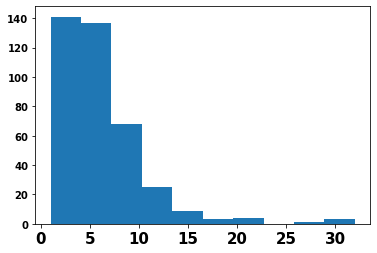

In [297]:
plt.hist([len(seq.split(",")) for seq in data_train["sig_gene_seq"].values])
plt.show()

In [298]:
import tensorflow as tf

In [299]:
# have an input layer
input_layer = tf.keras.layers.Input(shape = (), dtype = tf.string)

In [300]:
len(np.unique([gene for seq in data_train["sig_gene_seq"].values for gene in seq.split(",")]))

429

In [301]:
X_train_seq = [seq.replace(",", " ") for seq in data_train["sig_gene_seq"].values]

In [302]:
X_test_seq = [seq.replace(",", " ") for seq in data_test["sig_gene_seq"].values]

In [303]:
max_tokens = 300

In [246]:
# pass this to a vectorization layer
# but first make a vectorization layer
text_vec_layer = tf.keras.layers.TextVectorization(max_tokens = max_tokens, output_mode = "int",
                                                  output_sequence_length=15, standardize = None)

In [247]:
text_vec_layer.adapt(X_train_seq)

In [248]:
# pass the input through this text vectorization layer
vectorized_text = text_vec_layer(input_layer)

In [249]:
# instantiate an embedding layer
emb_layer = tf.keras.layers.Embedding(max_tokens, 32, mask_zero = True)

In [250]:
# pass the vectorized text through the embedding layer
emb_output = emb_layer(vectorized_text)

In [251]:
# instantiate a recurrent layer
gru_layer = tf.keras.layers.GRU(16)

In [252]:
# pass the emb output through the gru
gru_output = gru_layer(emb_output)

In [253]:
# classification layer
classification_layer = tf.keras.layers.Dense(len(np.unique(targets_train)))

In [254]:
# class output
class_output = classification_layer(gru_output)

In [255]:
# make the model
model = tf.keras.models.Model(input_layer, class_output)

In [256]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
text_vectorization_5 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 15, 32)            9600      
_________________________________________________________________
gru_3 (GRU)                  (None, 16)                2400      
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 119       
Total params: 12,119
Trainable params: 12,119
Non-trainable params: 0
_________________________________________________________________


In [257]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
             optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), 
             metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [258]:
from sklearn.preprocessing import LabelEncoder

In [259]:
le = LabelEncoder()

In [240]:
targets_train = le.fit_transform(targets_train)

In [241]:
targets_test = le.transform(targets_test)

In [261]:
Counter(targets_train)

Counter({4: 81, 5: 146, 0: 24, 1: 27, 3: 61, 6: 22, 2: 30})

In [260]:
# fit the model
model.fit(data_train[["sig_gene_seq"]].values, np.array(targets_train), verbose = 1, batch_size = 8, 
         validation_data = (data_test[["sig_gene_seq"]].values, np.array(targets_test)), 
         epochs = 200, callbacks = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                                                   patience = 50, mode = "min",
                                                                    restore_best_weights = True))

Epoch 1/200
49/49 [==============================] - 5s 35ms/step - loss: 1.8997 - sparse_categorical_accuracy: 0.3734 - val_loss: 1.8259 - val_sparse_categorical_accuracy: 0.4427
Epoch 2/200
49/49 [==============================] - 1s 18ms/step - loss: 1.7840 - sparse_categorical_accuracy: 0.3734 - val_loss: 1.6814 - val_sparse_categorical_accuracy: 0.4427
Epoch 3/200
49/49 [==============================] - 1s 18ms/step - loss: 1.7070 - sparse_categorical_accuracy: 0.3734 - val_loss: 1.6374 - val_sparse_categorical_accuracy: 0.4427
Epoch 4/200
49/49 [==============================] - 1s 18ms/step - loss: 1.7020 - sparse_categorical_accuracy: 0.3734 - val_loss: 1.6308 - val_sparse_categorical_accuracy: 0.4427
Epoch 5/200
49/49 [==============================] - 1s 18ms/step - loss: 1.7002 - sparse_categorical_accuracy: 0.3734 - val_loss: 1.6335 - val_sparse_categorical_accuracy: 0.4427
Epoch 6/200
49/49 [==============================] - 1s 17ms/step - loss: 1.6992 - sparse_categorica

49/49 [==============================] - 1s 17ms/step - loss: 1.6593 - sparse_categorical_accuracy: 0.3913 - val_loss: 1.6188 - val_sparse_categorical_accuracy: 0.4427
Epoch 92/200
49/49 [==============================] - 1s 17ms/step - loss: 1.6595 - sparse_categorical_accuracy: 0.3862 - val_loss: 1.6215 - val_sparse_categorical_accuracy: 0.4427
Epoch 93/200
49/49 [==============================] - 1s 17ms/step - loss: 1.6570 - sparse_categorical_accuracy: 0.3887 - val_loss: 1.6262 - val_sparse_categorical_accuracy: 0.4427
Epoch 94/200
49/49 [==============================] - 1s 18ms/step - loss: 1.6588 - sparse_categorical_accuracy: 0.3836 - val_loss: 1.6234 - val_sparse_categorical_accuracy: 0.4427
Epoch 95/200
49/49 [==============================] - 1s 18ms/step - loss: 1.6621 - sparse_categorical_accuracy: 0.3887 - val_loss: 1.6232 - val_sparse_categorical_accuracy: 0.4427
Epoch 96/200
49/49 [==============================] - 1s 17ms/step - loss: 1.6574 - sparse_categorical_accur

KeyboardInterrupt: 

### Few Shot Learning

**High Level Goal** - We will handle the classes we lumped in the unknown class using few shot learning. 

In [147]:
# unknown classes
not_top_k

['beta-mannan',
 'pectin',
 'beta-glucan',
 'galactan',
 'cellulose',
 'cellooligosaccharide',
 'chitin',
 'starch',
 'other',
 'alpha-mannan',
 'fructan',
 'alpha-glucan',
 'glycogen',
 'dextran',
 'xanthan']

In [148]:
# get those data from the train data
not_top_k_data_train = data_train[data_train.target.isin(not_top_k)].reset_index(drop = True)

In [149]:
not_top_k_data_train.head()

,sequence,target
0,"4.A.3,4.A.3,4.A.3,8.A.49,GntR,GH26",beta-mannan
1,"GH5,1.B.14,GH5,GH2,GH5,GH140,GH130,2.A.2,GH78|CBM67",other
2,"Pyr_redox_2,GH13|CBM48,GT5,GT35,CBM34|GH13,3.A.1",glycogen
3,"1.B.14,GH30,GH3",beta-glucan
4,"GH16|GH0,GH3,SIS+SIS,GntR,1.A.30,1.A.30,1.B.14",chitin


In [150]:
# shape
not_top_k_data_train.shape

(109, 2)

In [151]:
not_top_k_data_train["target"].value_counts()

beta-mannan             18
pectin                  16
beta-glucan             11
galactan                10
cellulose                9
chitin                   8
cellooligosaccharide     8
starch                   7
other                    6
alpha-mannan             5
fructan                  5
alpha-glucan             3
glycogen                 1
dextran                  1
xanthan                  1
Name: target, dtype: int64

In [152]:
# get those data from the test data
not_top_k_data_test = data_test[data_test.target.isin(not_top_k)].reset_index(drop = True)

In [153]:
not_top_k_data_test.head()

,sequence,target
0,"GH3,HTH_AraC,GH16,1.B.14,8.A.46,GH3",beta-glucan
1,"GH130,LacI,GH130,SBP_bac_1,GH27,3.A.1,3.A.1,CE7",beta-mannan
2,"8.A.9,CBM34|GH13,3.A.1,3.A.1,3.A.1",other
3,"GH1,HTH_6+SIS,3.A.1,8.A.59,Response_reg+HTH_18+HTH_AraC,3.A.1,3.A.1,3.A.1",galactan
4,"LacI,1.B.3,GH42,GH53,3.A.1,3.A.1,3.A.1,3.A.1",galactan


In [154]:
# shape
not_top_k_data_test.shape

(67, 2)

In [155]:
from metric_learn import NCA

In [156]:
from sklearn.preprocessing import FunctionTransformer

In [157]:
# classifier again
clf = Pipeline([('countvectorizer', CountVectorizer(tokenizer=lambda x: x.split(','))),
                ('ft', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)), 
                ('nca', NCA()),
                ('rf', RandomForestClassifier(n_jobs = 6))])

In [158]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'countvectorizer__min_df': [1,2,3],
    'rf__n_estimators': [100,200,400], 
    'rf__max_features': ["auto", "log2"]
}

In [159]:
# fit the search
search = GridSearchCV(clf, param_grid, n_jobs=6 , verbose = 3, cv = 5, scoring = "accuracy")
search.fit(not_top_k_data_train["sequence"], not_top_k_data_train["target"])

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\vedpi\anaconda3\envs\newone\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(tokenizer=<function <lambda> at 0x00000228B1343310>)),
                                       ('ft',
                                        FunctionTransformer(accept_sparse=True,
                                                            func=<function <lambda> at 0x00000228B14BD790>)),
                                       ('nca', NCA()),
                                       ('rf',
                                        RandomForestClassifier(n_jobs=6))]),
             n_jobs=6,
             param_grid={'countvectorizer__min_df': [1, 2, 3],
                         'rf__max_features': ['auto', 'log2'],
                         'rf__n_estimators': [100, 200, 400]},
             scoring='accuracy', verbose=3)

In [160]:
# mean average accuracy
search.best_score_

0.5593073593073592

In [161]:
# standard error
search.cv_results_['std_test_score'][np.argmax(search.cv_results_['mean_test_score'])]

0.06971713294960137

In [162]:
# best parameters
search.best_params_

{'countvectorizer__min_df': 3,
 'rf__max_features': 'log2',
 'rf__n_estimators': 100}

In [163]:
# get the best estimator
best_estimator = search.best_estimator_

In [164]:
# fit again
best_estimator.fit(not_top_k_data_train["sequence"], not_top_k_data_train["target"])

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(min_df=3,
                                 tokenizer=<function <lambda> at 0x00000228B1343310>)),
                ('ft',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x00000228B14BD790>)),
                ('nca', NCA()),
                ('rf', RandomForestClassifier(max_features='log2', n_jobs=6))])

In [165]:
# predicitions on test
y_test_pred = best_estimator.predict(not_top_k_data_test["sequence"])

In [166]:
# get the array of confusion matrix
cm = confusion_matrix(not_top_k_data_test["target"], y_test_pred)

In [168]:
# which is the missing class
missing_classes = [classes for classes in best_estimator.classes_ if classes not in np.unique(not_top_k_data_test["target"])]

missing_classes

['alpha-glucan', 'cellooligosaccharide', 'xanthan']

In [169]:
# dataframe for confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in best_estimator.classes_ if i not in missing_classes],
                  columns = [i for i in best_estimator.classes_ if i not in missing_classes])

ValueError: Shape of passed values is (14, 14), indices imply (12, 12)

In [ ]:
# make the plot
plt.figure(figsize = (10, 8))
sns.heatmap(df_cm, annot = True)
plt.title("confusion matrix for the test set", fontsize = 20)
plt.xlabel("Predicted Label", fontsize = 20)
plt.ylabel("True Label", fontsize = 20)
plt.show()


In [ ]:
## get the accuracy

In [ ]:
accuracy_score(not_top_k_data_test["target"], y_test_pred)

### Maybe another random forest for the unknowns?

In [ ]:
clf = Pipeline([('countvectorizer',CountVectorizer(tokenizer=lambda x: x.split(','))),
                ('rf',RandomForestClassifier(n_jobs = 6))])
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'countvectorizer__min_df': [1,2],
    'rf__n_estimators': [100,200,400], 
    'rf__max_features': ["auto", "log2"]
}
# fit the search
search = GridSearchCV(clf, param_grid, n_jobs=7 , verbose = 3, cv = 5, scoring = "accuracy")
# fir the grid search
search.fit(not_top_k_data_train["sequence"], not_top_k_data_train["target"])

In [ ]:
# mean average accuracy
search.best_score_

In [ ]:
# standard error
search.cv_results_['std_test_score'][np.argmax(search.cv_results_['mean_test_score'])]

In [ ]:
# best parameters
search.best_params_

In [ ]:
# get the best estimator
best_estimator = search.best_estimator_

In [ ]:
# fit again
best_estimator.fit(not_top_k_data_train["sequence"], not_top_k_data_train["target"])

In [ ]:
# predicitions on test
y_test_pred = best_estimator.predict(not_top_k_data_test["sequence"])

In [ ]:
# get the array of confusion matrix
cm = confusion_matrix(not_top_k_data_test["target"], y_test_pred)

In [ ]:
# in train there was one more class than the test
best_estimator.classes_

In [ ]:
# which is the missing class
missing_classes = [classes for classes in best_estimator.classes_ if classes not in np.unique(not_top_k_data_test["target"])]

In [ ]:
missing_classes

In [ ]:
# dataframe for confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in best_estimator.classes_ if i not in missing_classes],
                  columns = [i for i in best_estimator.classes_ if i not in missing_classes] )

In [ ]:
# make the plot
plt.figure(figsize = (10, 8))
sns.heatmap(df_cm, annot = True)
plt.title("confusion matrix for the test set", fontsize = 20)
plt.xlabel("Predicted Label", fontsize = 20)
plt.ylabel("True Label", fontsize = 20)
plt.show()


In [ ]:
## get the accuracy

In [ ]:
accuracy_score(not_top_k_data_test["target"], y_test_pred)

### Metric Learning and MDS

### Try some semi supervised learning

In [86]:
unsupervised = pd.read_csv("all_unsupervised_genes.csv")

In [87]:
unsupervised.head()

,sequence
0,"1.A.72,MerR,GH23"
1,"3.A.1,CE4"
2,"3.A.23,9.A.5,MCPsignal,2.A.21,2.A.22,TetR_N,3.A.1,3.A.1,HATPase_c|HisKA,1.A.8,2.A.25,2.A.66,4.A.1,GH13_29,GntR,3.A.1,GGDEF|PAS,DeoRC|HTH_DeoR,PfkB,4.A.2,2.A.88"
3,"CE4,8.A.5,3.A.1,3.A.1,3.A.1"
4,"GT51,Peripla_BP_2,3.A.1,3.A.1,9.B.169"


In [89]:
# keep the sequences which have atleast one gene occuring in the training data? 

In [90]:
# training data genes

In [88]:
train_genes = [gene for seq in data_train["sig_gene_seq"].values for gene in seq.split(",")]

In [89]:
unsupervised_seq_to_supervised = []
for seq in tqdm(unsupervised["sequence"]): 
    unsupervised_genes = seq.split(",")
    if len(set(unsupervised_genes).intersection(train_genes)) > 3:
        unsupervised_seq_to_supervised.append(seq)
        

  0%|          | 0/771293 [00:00<?, ?it/s]

In [90]:
len(unsupervised_seq_to_supervised)

288867

In [91]:
preds = best_estimator.predict(unsupervised_seq_to_supervised)

In [92]:
Counter(preds)

Counter({'mono/di/trisaccharide': 114698,
         'multiple_substrates': 49335,
         'other': 51292,
         'capsule polysaccharide': 46574,
         'O-antigen': 23249,
         'algal glycans': 2064,
         'pectin': 1655})

In [93]:
preds_proba = best_estimator.predict_proba(unsupervised_seq_to_supervised)

In [94]:
max_probs = preds_proba.max(axis = 1)

(array([1.00960e+04, 5.22030e+04, 1.05492e+05, 6.80790e+04, 2.53810e+04,
        1.42860e+04, 7.63000e+03, 3.32000e+03, 2.36400e+03, 1.60000e+01]),
 array([0.16  , 0.2225, 0.285 , 0.3475, 0.41  , 0.4725, 0.535 , 0.5975,
        0.66  , 0.7225, 0.785 ]),
 <BarContainer object of 10 artists>)

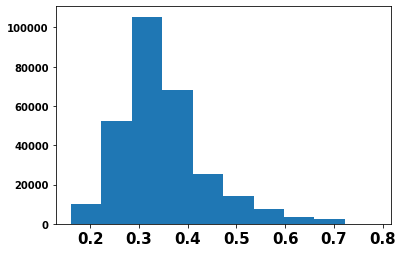

In [95]:
plt.hist(max_probs)

In [96]:
zipped = list(zip(unsupervised_seq_to_supervised, preds, max_probs))

In [102]:
# combine all together
unsupervised_data_with_preds = pd.DataFrame(zipped, columns = ["sig_gene_seq", "high_level_substr", "prediction_prob"])

In [107]:
unsupervised_data_with_preds_sure = unsupervised_data_with_preds[unsupervised_data_with_preds["prediction_prob"] > 0.4]

In [108]:
unsupervised_data_with_preds_sure["high_level_substr"].value_counts()

mono/di/trisaccharide     28270
capsule polysaccharide    17170
other                     10384
multiple_substrates        3279
pectin                      468
O-antigen                   379
algal glycans               253
Name: high_level_substr, dtype: int64

In [115]:
unsupervised_data_with_preds_sure

,sig_gene_seq,high_level_substr,prediction_prob
6,"GH16_3|CBM4|CBM4|CBM4|CBM4,GH161,LacI|Peripla_BP_3,3.A.1,3.A.1,SBP_bac_1,GH1,SpoVT_AbrB,3.A.3,HMA,3.A.1,3.A.1,3.A.1,3.A.1,2.A.21,2.A.21,2.A.15,PALP,2.A.59,STAS,2.A.24,dCache_1|PAS|HATPase_c,2.A.53",multiple_substrates,0.467111
20,"2.A.23,CE0,GH4,HTH_18|AraC_binding,4.A.3,4.A.3,4.A.3",mono/di/trisaccharide,0.690000
21,"GT4,9.B.67,Pyr_redox,2.A.66",O-antigen,0.426556
22,"GT4,2.A.66,9.B.18,GT4,NUDIX,GT2,GT4,GT2,8.A.3,1.B.18,2.A.109,9.B.22,9.B.34",capsule polysaccharide,0.570000
27,"GH103,4.A.4,4.A.4,4.A.4,DeoRC|HTH_DeoR,SIS|CBS,3.A.23,Pyr_redox_2,5.A.3,Peripla_BP_3|LacI,4.A.1,GH1,3.D.1,3.D.1,3.D.1,3.D.1,3.D.1,3.D.1",mono/di/trisaccharide,0.480000
...,...,...,...
288840,"3.A.1,3.A.23,HTH_18,2.A.1,HxlR,2.A.1,GT4,GT4,GT2,8.A.3,1.B.18,9.B.18",capsule polysaccharide,0.460000
288850,"AA3_2,3.A.1,3.A.1,3.A.1,3.A.1,3.A.1,3.A.1,3.A.1,3.A.1,3.A.1,CbiA,2.A.45,3.A.2,3.A.2,3.A.2,3.A.2,3.A.2,3.A.2,3.A.2,4.C.1,3.A.1,3.A.11,3.A.1",multiple_substrates,0.402944
288854,"3.A.23,GH23,1.B.1,Sigma70_r2|Sigma70_r4_2,FecR,1.B.14,HTH_1|LysR_substrate,Glyoxalase,HTH_1|LysR_substrate,2.A.11",multiple_substrates,0.419333
288862,"1.B.12,Peripla_BP_3|LacI,3.A.1,SBP_bac_1,3.A.1,3.A.1,GH42,2.A.1,GH53,1.B.14,Sigma70_r3|Response_reg|HTH_18,1.B.40,Glyoxalase,MerR,3.A.1,3.A.1,3.A.1,2.A.1,3.A.1,3.A.1,3.A.1,AraC_binding|HTH_18,2.A.86,Peripla_BP_3|HTH_18,3.A.1,3.A.1,3.A.1,1.B.14",other,0.443000


In [114]:
from imblearn.under_sampling import RandomUnderSampler 

In [116]:
rus = RandomUnderSampler(random_state=42)

In [123]:
X_res, y_res = rus.fit_resample(np.array(unsupervised_data_with_preds_sure["sig_gene_seq"]).reshape(-1,1), 
                unsupervised_data_with_preds_sure["high_level_substr"])

In [125]:
Counter(y_res)

Counter({'O-antigen': 253,
         'algal glycans': 253,
         'capsule polysaccharide': 253,
         'mono/di/trisaccharide': 253,
         'multiple_substrates': 253,
         'other': 253,
         'pectin': 253})

In [126]:
vectorizer = CountVectorizer(tokenizer=lambda x: str(x).split(','), lowercase = False)

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
vectorizer.fit(data_train["sig_gene_seq"])

C:\Users\vedpi\anaconda3\envs\newone\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(lowercase=False,
                tokenizer=<function <lambda> at 0x0000029B292123A0>)

In [129]:
X_train_unsupervised = vectorizer.transform(X_res)

In [130]:
clf = LogisticRegression(random_state=42, n_jobs = 6)

In [131]:
clf.fit(X_train_unsupervised, y_res)

LogisticRegression(n_jobs=6, random_state=42)

In [132]:
X_test_unsupervised = vectorizer.transform(data_test["sig_gene_seq"])

In [133]:
y_test_pred_from_unsupervised = clf.predict(X_test_unsupervised)

In [134]:
np.mean(y_test.values == y_test_pred_from_unsupervised)

0.2366412213740458